# Table of Contents
<a id="toc"></a>
- [1. Data Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. Data Exploaring and Preparation](#3)
    - [3.1 Diminsions of the data](#3.1)
- [4. EDA](#4)
    - [4.1 Visualizations](#4.1)
    - [4.2 Distrbution of the target variable](#4.2)
- [5. Feature Engineering](#5)
- [6. Scalling and Assigning Feature and Target variables](#6)
- [7. Spliting the Data into Training and Testing Data](#7)
- [8. Modeling](#8)
    - [8.1 tpot autoML](#8.1)
    - [8.2 Accuracy of tpot model](#8.2)
- [9. Report](#9)
    - [9.1 Classification Report](#9.1)
    - [9.2 Confusion Matrix](#9.2)

<a id = '2'></a>
# Import Necssaries Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tpot import TPOTClassifier

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='3'></a>
# Data Exploaring and Preparation

In [2]:
df = pd.read_csv('../input/parkinsons-data-set/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<a id='3.1'></a>
**Diminsions of the data**

In [3]:
df.shape # 195 rows and 24 features

(195, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

In [6]:
df['MDVP:Jitter(Abs)'].value_counts()

0.000030    46
0.000040    28
0.000020    28
0.000010    20
0.000050    17
0.000060    16
0.000080     9
0.000070     8
0.000090     5
0.000009     5
0.000100     3
0.000110     2
0.000150     2
0.000007     1
0.000260     1
0.000120     1
0.000220     1
0.000160     1
0.000140     1
Name: MDVP:Jitter(Abs), dtype: int64

**All the features are continous**

In [7]:
df.columns[df.isna().any()] # No null values

Index([], dtype='object')

In [8]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='4'></a>
# EDA

In [10]:
FEATURES = [col for col in df.columns if col not in ['name', 'status']]

In [11]:
FEATURES

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

<a id='4.1'></a>
***Visualization***

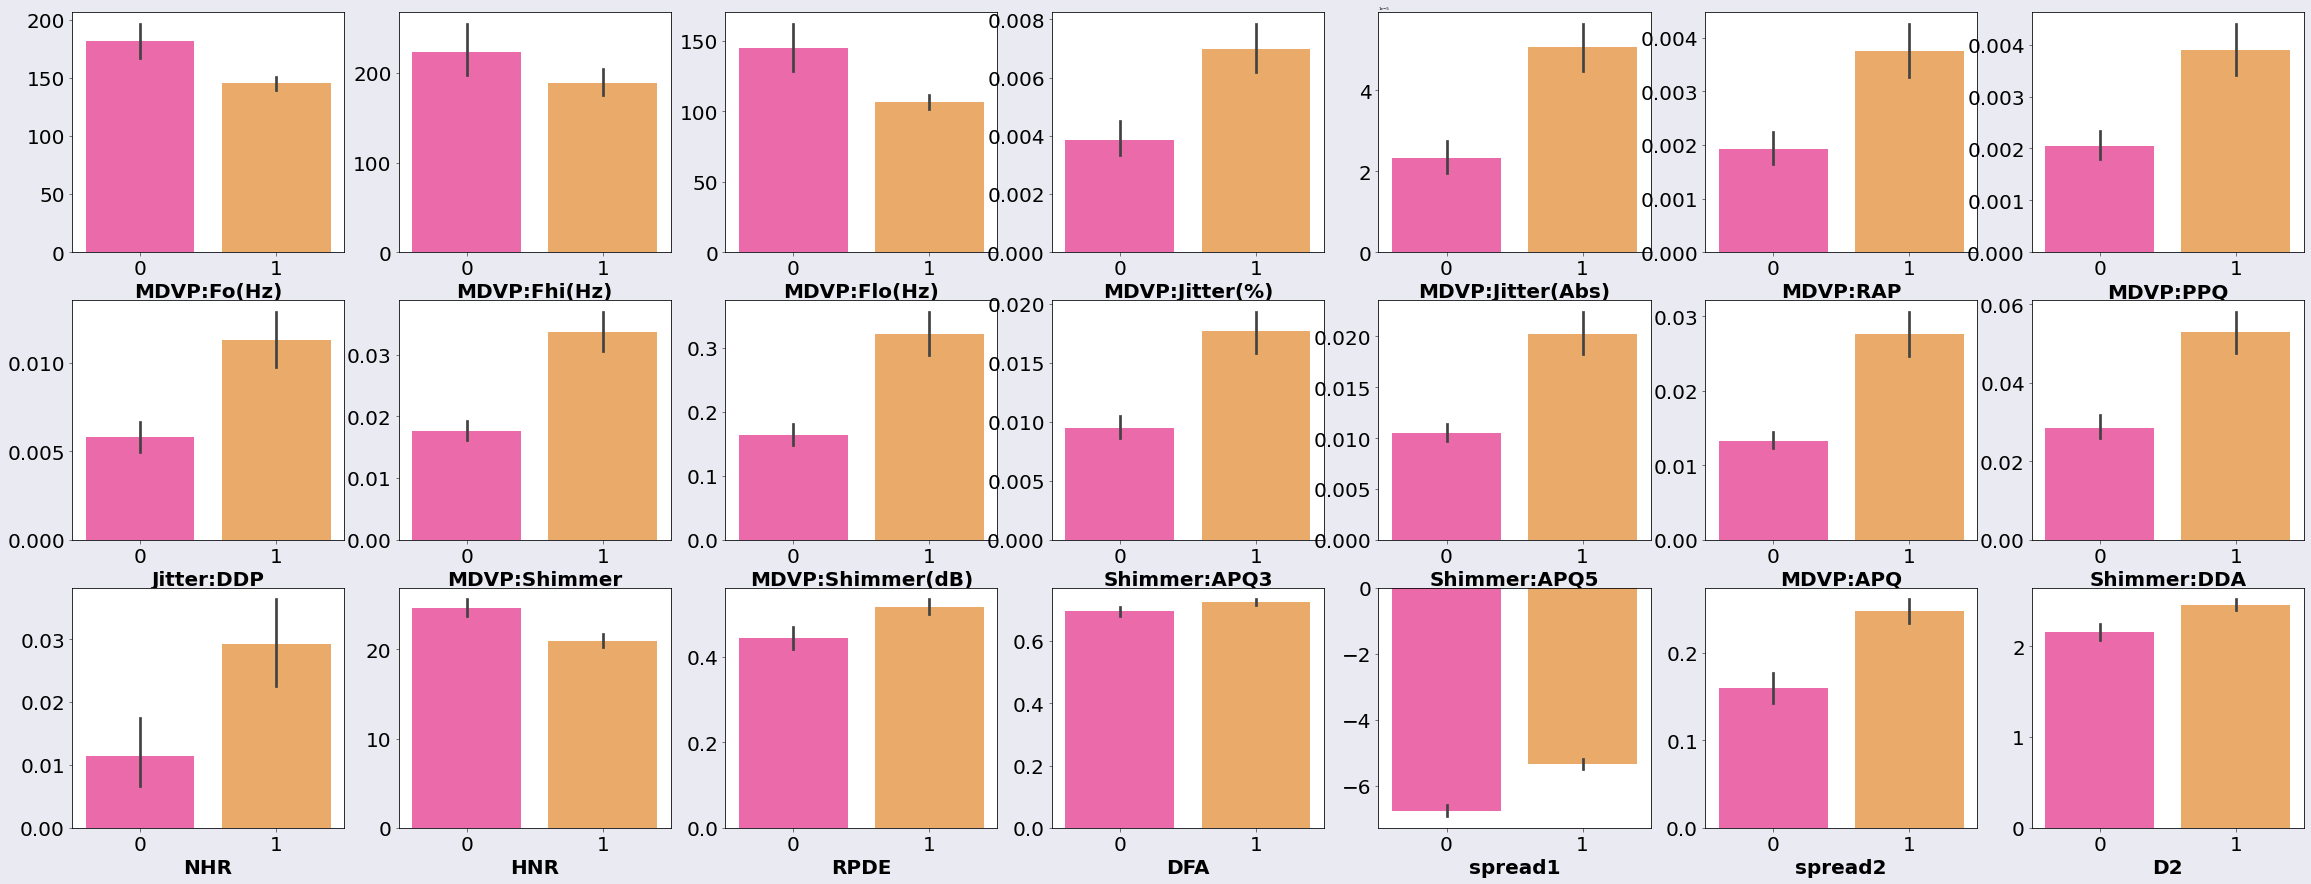

In [12]:
# barplot to all the continous features (target variable status on x-axis, continous features on y-axis)
# 0 -> magenta, 1 -> orange 
ncols = 7
nrows = int(len(FEATURES) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(40, 15), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = FEATURES[r*ncols+c]
        sns.barplot(y=df[col], x=df['status'], ax=axes[r, c], palette='spring', label='Train data')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=20, fontweight='bold')
        axes[r, c].tick_params(labelsize=20, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

**conclusion from the barplots:**<br><br>
   * When these values of these features [MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), HNR] increase, pepole in the data are more likely to be in good health 
   * the rest of the features when increase Most pepole in the data have Parkinson's disease

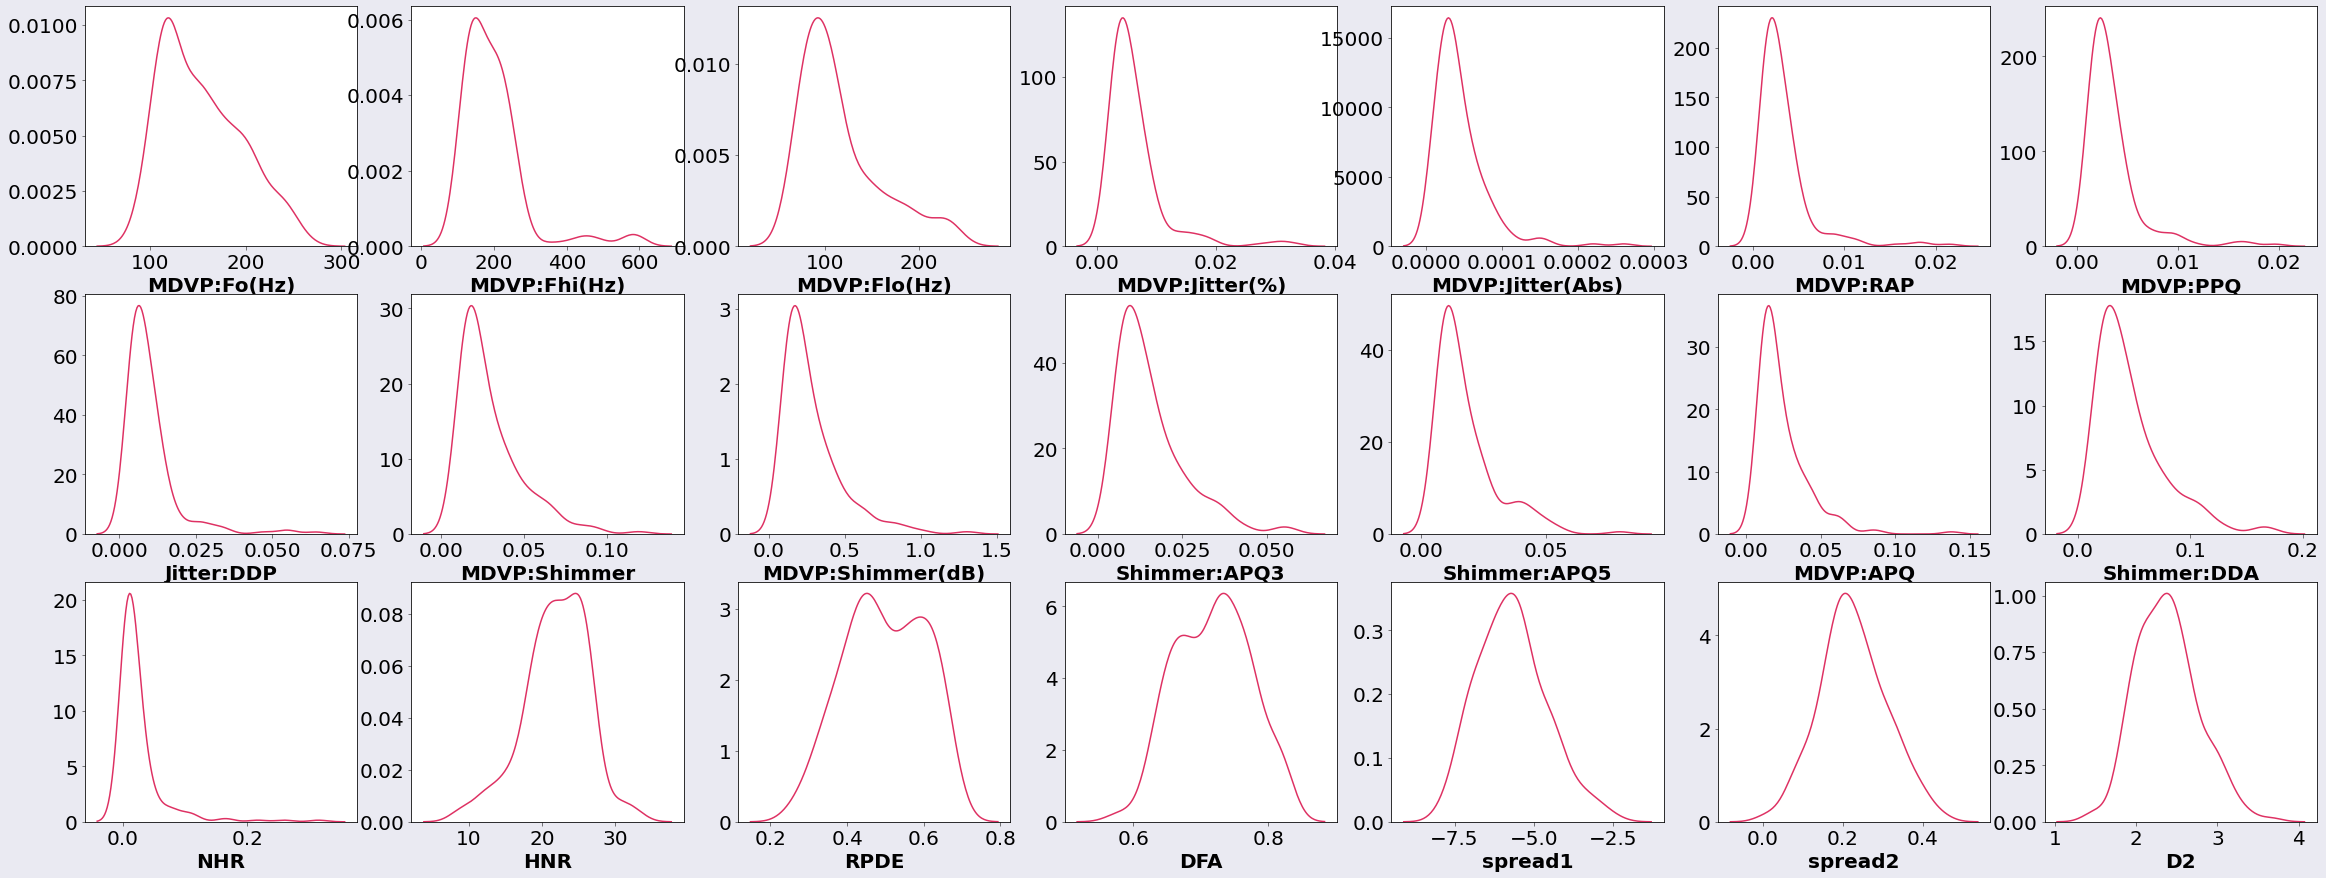

In [13]:
# Distrbution for all the continous features
ncols = 7
nrows = int(len(FEATURES) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(40, 15), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = FEATURES[r*ncols+c]
        sns.kdeplot(x=df[col], ax=axes[r, c], color='#DE3163')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=20, fontweight='bold')
        axes[r, c].tick_params(labelsize=20, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

**conclusion from the kdeplots:**<br><br>
- all the features are skewed to the right except (HNR, RPDE, DFA, spread1, spread2, D2) are approximatly normal distrbution

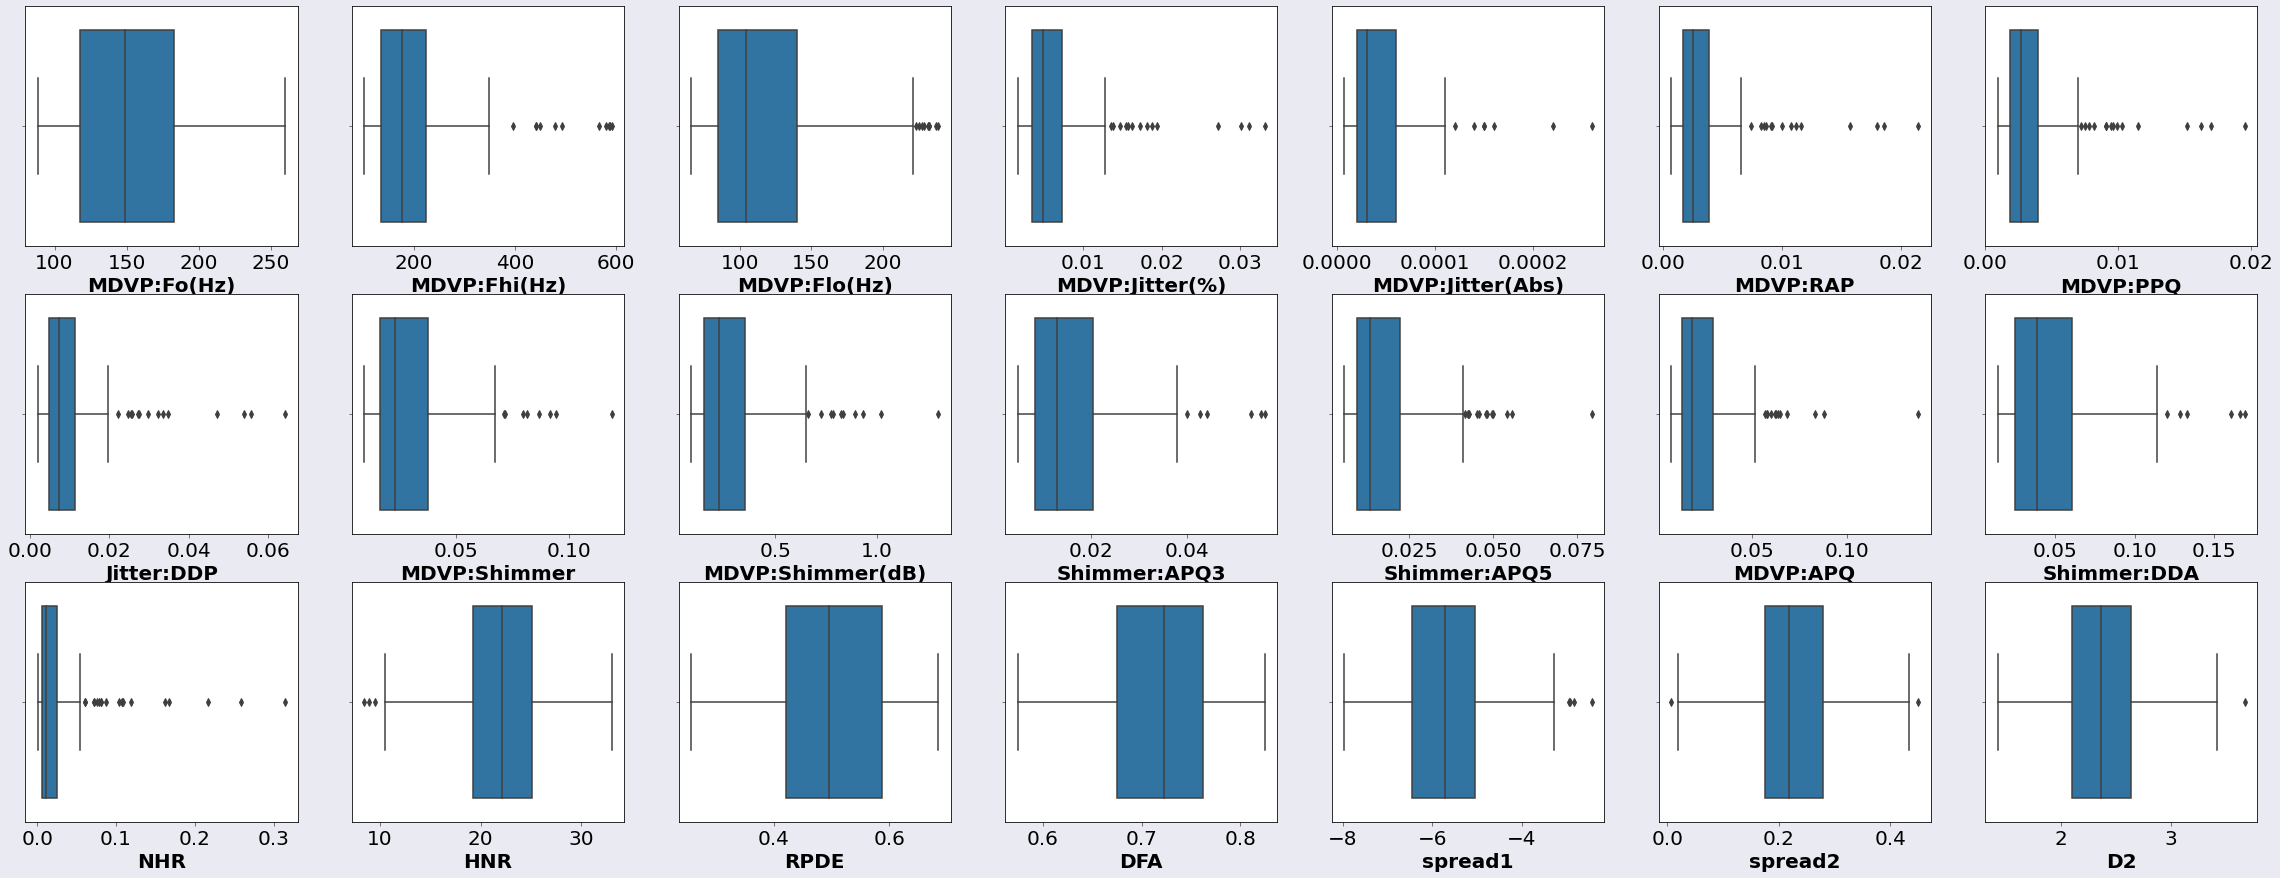

In [14]:
# boxplot for all the features
ncols = 7
nrows = int(len(FEATURES) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(40, 15), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = FEATURES[r*ncols+c]
        sns.boxplot(x=df[col], ax=axes[r, c])
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=20, fontweight='bold')
        axes[r, c].tick_params(labelsize=20, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

In [15]:
status_df = df.copy()

In [16]:
status_df.status.unique()

array([1, 0])

In [17]:
status_df.status = status_df.status.apply(lambda x: 'Sick' if x == 1 else 'Healthy')

In [18]:
status_df.status.unique()

array(['Sick', 'Healthy'], dtype=object)

In [19]:
status_df.status.value_counts()

Sick       147
Healthy     48
Name: status, dtype: int64

<a id='4.2'></a>
***Distrbution of the target variable***

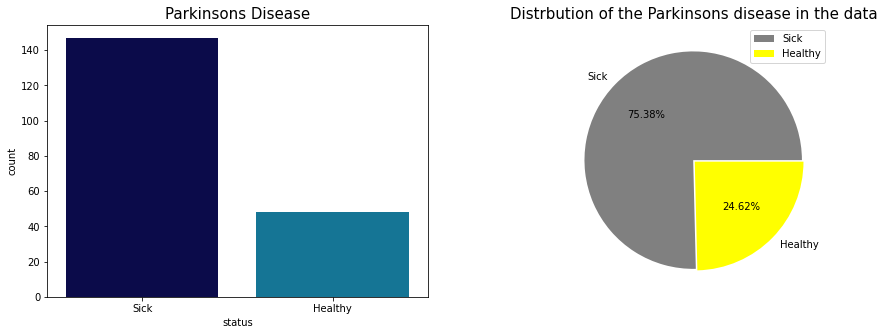

In [20]:
plt.figure(figsize=(15,11))

plt.subplot(2,2,1)
plt.title('Parkinsons Disease', {'fontsize':'15'})
sns.countplot(x='status', data=status_df, palette='ocean');

plt.subplot(2,2,2)
yes = status_df.status[status_df.status == 'Sick'].count()
no = status_df.status[status_df.status == 'Healthy'].count()
plt.title("Distrbution of the Parkinsons disease in the data", {'fontsize':'15'})
plt.pie([yes, no], labels=['Sick', 'Healthy'], autopct="%.2f%%", explode = [0.01,0.01], colors=['gray', 'yellow'])
plt.legend()
plt.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='5'></a>
# Feature Engineering

In [21]:
df["mean"] = df[FEATURES].mean(axis=1)
df["std"] = df[FEATURES].std(axis=1)
df["min"] = df[FEATURES].min(axis=1)
df["max"] = df[FEATURES].max(axis=1)

FEATURES.extend(['mean', 'std', 'min', 'max'])

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='6'></a>
# Scalling and Assigning Feature and Target variables

In [22]:
scaler = StandardScaler()
for col in FEATURES:
    df[col] = scaler.fit_transform(df[col].to_numpy().reshape(-1,1))
    
X = df[FEATURES].to_numpy()
y = df['status'].to_numpy()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id ='7'></a>
# Spliting the Data into Training and Testing Data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=10)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='8'></a>
# Modeling

<a id='8.1'></a>
***tpot autoML modeling***

In [24]:
tpot_model = TPOTClassifier(generations=10, population_size=200, 
                           verbosity=2, cv=10, random_state=10)
tpot_model.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/2200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9395238095238095

Generation 2 - Current best internal CV score: 0.9461904761904762

Generation 3 - Current best internal CV score: 0.9461904761904762

Generation 4 - Current best internal CV score: 0.9595238095238094

Generation 5 - Current best internal CV score: 0.9595238095238094

Generation 6 - Current best internal CV score: 0.9595238095238094

Generation 7 - Current best internal CV score: 0.9661904761904762

Generation 8 - Current best internal CV score: 0.9661904761904762

Generation 9 - Current best internal CV score: 0.9661904761904762

Generation 10 - Current best internal CV score: 0.9661904761904762

Best pipeline: GradientBoostingClassifier(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), learning_rate=0.1, max_depth=4, max_features=0.35000000000000003, min_samples_leaf=14, min_samples_split=20, n_estimators=100, subsample=0.9500000000000001)


TPOTClassifier(cv=10, generations=10, population_size=200, random_state=10,
               verbosity=2)

<a id='8.2'></a>
***Accuracy of tpot model***

In [25]:
tpot_model.score(X_test, y_test)

0.9387755102040817

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='9'></a>
# Report

<a id='9.1'></a>
***Classification Report***

In [26]:
y_pred = tpot_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.97      0.94      0.96        36

    accuracy                           0.94        49
   macro avg       0.91      0.93      0.92        49
weighted avg       0.94      0.94      0.94        49



<a id='9.2'></a>
***Confusion Matrix***

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  1],
       [ 2, 34]])

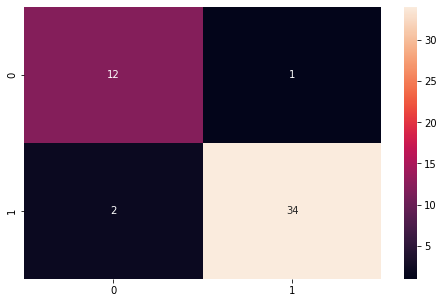

In [28]:
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True);

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>